# **<center>Universidad Nacional Autónoma de México**
---
**<center>Programación Avanzada** 
**<center>Geovani Benita** 
**<center>Javier Reyes** 
**<center>Fátima Rodríguez** 
<center>14/09/2021</center>


---


# **Indicaciones**
1. Realizar un programa en algún lenguaje imperativo que
muestre todos lo cuadros mágicos de tamaño n, el cual es leído por el
programa. (n = 3, 4 o 5 porque para mayores tarda demasiado).

# **Instrucciones de Ejecución**

Para ejecutarlo, la variable "tamanioCuadroMagico" debe ser modificada en el bloque llamado "Configuración del Programa" en la parte baja. Actualmente se muestra la ejecución para **n=3**

# Versión Final

In [ ]:
import itertools
import sys
import time

######################################
#  Declaracion de Variables Globales #
######################################
tamanioCuadroMagico=0
numeroSoluciones=0
numeroMagico=0
tamanioMaximo=0
debugEnable = False
numeroTotaldeCuadros=0

############################################################################
#Nom de la funcion       : imprimirCuadro 
#Descripcion             : Imprime un cuadro 
#
#Documentacion Params    : 
#
#Tipo          Nombre                          Descripcion 
#=========     ======================          ============================= 
# Arreglo      cuadrado                        Arreglo bidimensional 
############################################################################

def imprimirCuadro(cuadrado):
	print("--------> imprimirCuadro")
	for i in range(tamanioCuadroMagico):
		for j in range(tamanioCuadroMagico):
			print (cuadrado[i][j], end ="   ")
		print ("\n")
	print("<------- imprimirCuadro")
    
    ############################################################################
#Nom de la funcion       : verificarCuadroMagico 
#Descripcion             : Verifica si un cuadro es magico
#
#Documentacion Params    : 
#
#Tipo          Nombre                          Descripcion 
#=========     ======================          ============================= 
# Arreglo      cuadrado                        Arreglo bidimensional 
############################################################################

def verificarCuadroMagico(cuadrado):
	if(debugEnable):
		print("-----> verificarCuadroMagico")
	sumaPorColumna=0
	sumaPorFila=0
	sumaDiagonal1=0
	sumaDiagonal2=0
	isCuadroMagico = True 
	for i in range(tamanioCuadroMagico):
		sumaPorColumna=0
		sumaPorFila=0
		for j in range(tamanioCuadroMagico):
			sumaPorColumna=sumaPorColumna + cuadrado[i][j]
			sumaPorFila=sumaPorFila + cuadrado[j][i]
		sumaDiagonal1 = sumaDiagonal1 + cuadrado[i][i]
		sumaDiagonal2 = sumaDiagonal2 + cuadrado[(tamanioCuadroMagico-1)-i][i]
		

		if (sumaPorColumna != numeroMagico) or (sumaPorFila != numeroMagico) :
			isCuadroMagico=False


	if (sumaDiagonal1!=numeroMagico) or (sumaDiagonal2!=numeroMagico):
		isCuadroMagico=False
	
	if(debugEnable):
		print("<------- %d"%isCuadroMagico)

	return isCuadroMagico

############################################################################
#Nom de la funcion       : verificaFilaMagica 
#Descripcion             : Verifica una fila con el numero magico
#
#Documentacion Params    : 
#
#Tipo          Nombre                          Descripcion 
#=========     ======================          ============================= 
# Arreglo      cuadrado                        Arreglo bidimensional
# Integer      numFila 						   Numero de fila a verificar 
############################################################################
def verificaFilaMagica(cuadrado,numFila):
	sumaPorFila=0
	isFilaMagica = True 
	for i in range(tamanioCuadroMagico):
		sumaPorFila= sumaPorFila + cuadrado[numFila-1][i]

	if (sumaPorFila!=numeroMagico):
		isFilaMagica=False

	return isFilaMagica

############################################################################
#Nom de la funcion       : construirCandidatos 
#Descripcion             : Construye una lista de posibles candidatos 
# 						             dado un cuadrado y no repetir numeros
#
#Documentacion Params    : 
#
#Tipo          Nombre                          Descripcion 
#=========     ======================          ============================= 
# Arreglo      cuadrado                        Arreglo bidimensional
# Integer      numFila 						   Numero de fila a verificar 
############################################################################

def construirCandidatos(cuadrado,numero):

	noDisponiblesList = [0 for x in range(tamanioMaximo+1)]
	candidatosList = [0 for x in range(tamanioMaximo)]
	alternateList = []
	listaFinal    = []
	posx=(numero//tamanioCuadroMagico)
	posy=(numero%tamanioCuadroMagico)
	#print("X =%d"%posx)
	#print("Y = %d"%posy)
	columnasFaltantes=tamanioCuadroMagico-posy
	#print("columnasFaltantes %d"%columnasFaltantes)
	sumaActual=cuadrado[posx][0]
	#print ("sumaActual %d"%cuadrado[posx][0])



	for i in range(tamanioCuadroMagico):
		for j in range(tamanioCuadroMagico):
			if(cuadrado[i][j]!=0):
				noDisponiblesList[cuadrado[i][j]] = 1

	#if(debugEnable):
	#	print noDisponiblesList

	for i in range(tamanioMaximo+1):
		if(noDisponiblesList[i] != 1) and (i!=0):
			candidatosList[i-1]= i
			alternateList.append(i)

		
		#if((x[0] + x[1]+sumaActual)<numeroMagico):
		#	print x
		#	if((x[0] in alternateList)):
		#		alternateList.remove(x[0])
				
	return alternateList


#################################################################################
#Nom de la funcion       : backTrack 
#Descripcion             : Metodo que realiza el backtrack, construye
#						               soluciones parciales de manera recursiva
#						               con los diferentes candidatos hasta 
#						               tener un cuadro completo y validarlo 
#
#Documentacion Params    : 
#
#Tipo          Nombre                          Descripcion 
#=========     ======================          ==================================
# int          numero                          Numero candidato a agregar/remover
# Array        cuadrado 					             Arreglo bidimensional del cuadro 
# int          numFila 						             Fila actual del cuadro
#################################################################################

def backTrack(numero,cuadrado,numFila):
	#imprimirCuadro(cuadrado)
	if(numero==(tamanioCuadroMagico*numFila)):
		filaCandidata=verificaFilaMagica(cuadrado,numFila)
		if(filaCandidata!=1):
			return None
	if(numero==tamanioMaximo):
		global numeroTotaldeCuadros
		numeroTotaldeCuadros +=1
		if(verificarCuadroMagico(cuadrado)):
			print("Es solucion")
			global numeroSoluciones 
			numeroSoluciones+=1
			imprimirCuadro(cuadrado)
	else:
		candidatosList=construirCandidatos(cuadrado,numFila)
		for i in range(len(candidatosList)):
			if(candidatosList[i]!=0):
				posx=(numero//tamanioCuadroMagico)
				posy=(numero%tamanioCuadroMagico)
				cuadrado[posx][posy]=candidatosList[i]
				backTrack(numero+1,cuadrado,numFila)
				cuadrado[posx][posy]=0
	return None

#Configuración del programa

En esta parte se establecen las variables que se poblarán con el resto de las funciones. Para que el programa se ejecute correctamente primero debe correrse el bloque anterior de código y posteriormente, este apartado:

In [ ]:
import itertools
import sys
import time

tamanioCuadroMagico=3 #Cambiar por el número de n deseado
numeroMagico= tamanioCuadroMagico*(tamanioCuadroMagico*tamanioCuadroMagico+1)/2
numeroSoluciones=0
tamanioMaximo = tamanioCuadroMagico * tamanioCuadroMagico
debugEnable=False
print ("Numero Magico %d " % numeroMagico) 
cuadroMagico = [[0 for x in range(tamanioCuadroMagico)] for x in range(tamanioCuadroMagico)] 


#imprimirCuadro(cuadroMagico)
start_time = time.time()
backTrack(0,cuadroMagico,1)
print("--- Total de segundos transcurridos %s  ---" % (time.time() - start_time))
print("Numero de soluciones encontradas %d" % numeroSoluciones)
print("Numero total de cuadros construidos %d"%numeroTotaldeCuadros)
#print ("IS cuadro Magico %d" % verificarCuadroMagico(cuadroMagico))

#print (construirCandidatos(cuadroMagico,2))

Numero Magico 15 
Es solucion
--------> imprimirCuadro
2   7   6   

9   5   1   

4   3   8   

<------- imprimirCuadro
Es solucion
--------> imprimirCuadro
2   9   4   

7   5   3   

6   1   8   

<------- imprimirCuadro
Es solucion
--------> imprimirCuadro
4   3   8   

9   5   1   

2   7   6   

<------- imprimirCuadro
Es solucion
--------> imprimirCuadro
4   9   2   

3   5   7   

8   1   6   

<------- imprimirCuadro
Es solucion
--------> imprimirCuadro
6   1   8   

7   5   3   

2   9   4   

<------- imprimirCuadro
Es solucion
--------> imprimirCuadro
6   7   2   

1   5   9   

8   3   4   

<------- imprimirCuadro
Es solucion
--------> imprimirCuadro
8   1   6   

3   5   7   

4   9   2   

<------- imprimirCuadro
Es solucion
--------> imprimirCuadro
8   3   4   

1   5   9   

6   7   2   

<------- imprimirCuadro
--- Total de segundos transcurridos 0.6875009536743164  ---
Numero de soluciones encontradas 8
Numero total de cuadros construidos 34560


# **Evidencia de Ejecución para n=4**

La siguiente imagen muestra el tiempo y el número de soluciones que tuvieron que desarrollarse para encontrar 3 soluciones válidas para un cuadro mágico de 4x4:

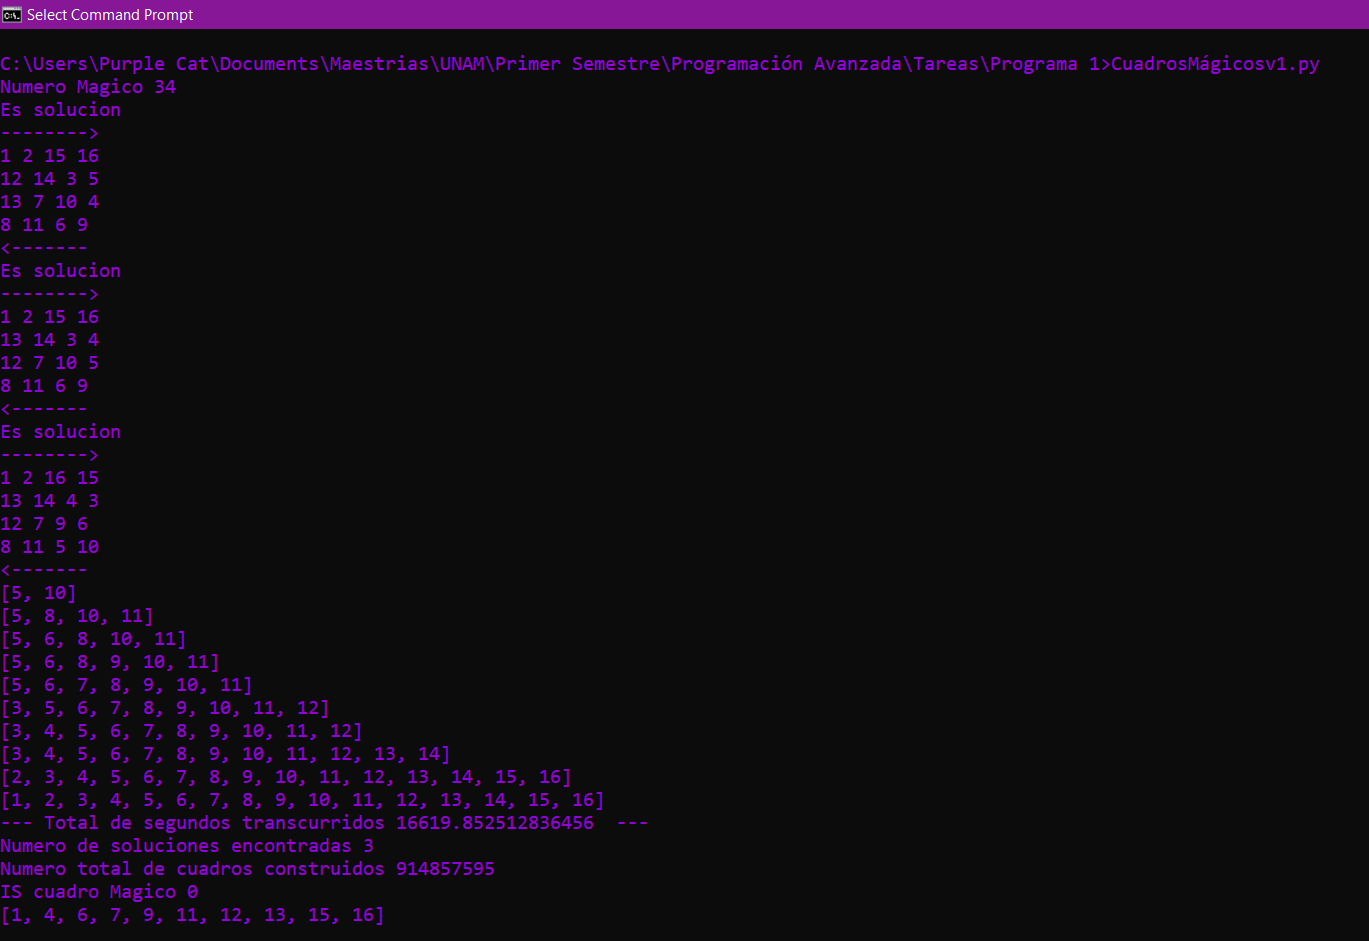

Para que la ejecución del programa arroje la pantalla anterior, se utilizó la siguiente versión de código, mismo que debe ejecutarse en lugar de los dos bloques de código anteriores. Es versión está programada para terminar la ejecución después de encontrar el primero cuadro mágico de 4x4, su ejecución tarda aproximadamente 1:30 horas:

#Versión que imprime 1er cuadro n = 4

In [ ]:
import itertools
import sys
import time

######################################
#  Declaracion de Variables Globales #
######################################
tamanioCuadroMagico=0
numeroSoluciones=0
numeroMagico=0
tamanioMaximo=0
debugEnable = False
numeroTotaldeCuadros=0

############################################################################
#Nom de la funcion       : imprimirCuadro 
#Descripcion             : Imprime un cuadro 
#
#Documentacion Params    : 
#
#Tipo          Nombre                          Descripcion 
#=========     ======================          ============================= 
# Arreglo      cuadrado                        Arreglo bidimensional 
############################################################################

def imprimirCuadro(cuadrado):
	print("-------->")
	for i in range(tamanioCuadroMagico):
		for j in range(tamanioCuadroMagico):
			print (cuadrado[i][j], end = " ")
		print(" ")
	print("<-------")
    
    ############################################################################
#Nom de la funcion       : verificarCuadroMagico 
#Descripcion             : Verifica si un cuadro es magico
#
#Documentacion Params    : 
#
#Tipo          Nombre                          Descripcion 
#=========     ======================          ============================= 
# Arreglo      cuadrado                        Arreglo bidimensional 
############################################################################

def verificarCuadroMagico(cuadrado):
	if(debugEnable):
		print("-----> verificarCuadroMagico")
	sumaPorColumna=0
	sumaPorFila=0
	sumaDiagonal1=0
	sumaDiagonal2=0
	isCuadroMagico = True 
	for i in range(tamanioCuadroMagico):
		sumaPorColumna=0
		sumaPorFila=0
		for j in range(tamanioCuadroMagico):
			sumaPorColumna=sumaPorColumna + cuadrado[i][j]
			sumaPorFila=sumaPorFila + cuadrado[j][i]
		sumaDiagonal1 = sumaDiagonal1 + cuadrado[i][i]
		sumaDiagonal2 = sumaDiagonal2 + cuadrado[(tamanioCuadroMagico-1)-i][i]
		

		if (sumaPorColumna != numeroMagico) or (sumaPorFila != numeroMagico) :
			isCuadroMagico=False


	if (sumaDiagonal1!=numeroMagico) or (sumaDiagonal2!=numeroMagico):
		isCuadroMagico=False
	
	if(debugEnable):
		print("<------- %d"%isCuadroMagico)

	return isCuadroMagico

############################################################################
#Nom de la funcion       : verificaFilaMagica 
#Descripcion             : Verifica una fila con el numero magico
#
#Documentacion Params    : 
#
#Tipo          Nombre                          Descripcion 
#=========     ======================          ============================= 
# Arreglo      cuadrado                        Arreglo bidimensional
# Integer      numFila 						   Numero de fila a verificar 
############################################################################
def verificaFilaMagica(cuadrado,numFila):
	sumaPorFila=0
	isFilaMagica = True 
	for i in range(tamanioCuadroMagico):
		sumaPorFila= sumaPorFila + cuadrado[numFila-1][i]

	if (sumaPorFila!=numeroMagico):
		isFilaMagica=False

	return isFilaMagica

############################################################################
#Nom de la funcion       : construirCandidatos 
#Descripcion             : Construye una lista de posibles candidatos 
# 						             dado un cuadrado y no repetir numeros
#
#Documentacion Params    : 
#
#Tipo          Nombre                          Descripcion 
#=========     ======================          ============================= 
# Arreglo      cuadrado                        Arreglo bidimensional
# Integer      numFila 						   Numero de fila a verificar 
############################################################################

def construirCandidatos(cuadrado,numero):

	noDisponiblesList = [0 for x in range(tamanioMaximo+1)]
	candidatosList = [0 for x in range(tamanioMaximo)]
	alternateList = []
	listaFinal    = []
	posx=(numero//tamanioCuadroMagico)
	posy=(numero%tamanioCuadroMagico)
	#print("X =%d"%posx)
	#print("Y = %d"%posy)
	columnasFaltantes=tamanioCuadroMagico-posy
	#print("columnasFaltantes %d"%columnasFaltantes)
	sumaActual=cuadrado[posx][0]
	#print ("sumaActual %d"%cuadrado[posx][0])

	for i in range(tamanioCuadroMagico):
		for j in range(tamanioCuadroMagico):
			if(cuadrado[i][j]!=0):
				noDisponiblesList[cuadrado[i][j]] = 1

	#if(debugEnable):
	#	print noDisponiblesList

	for i in range(tamanioMaximo+1):
		if(noDisponiblesList[i] != 1) and (i!=0):
			candidatosList[i-1]= i
			alternateList.append(i)

		
		#if((x[0] + x[1]+sumaActual)<numeroMagico):
		#	print x
		#	if((x[0] in alternateList)):
		#		alternateList.remove(x[0])
				
	return alternateList


#################################################################################
#Nom de la funcion       : backTrack 
#Descripcion             : Metodo que realiza el backtrack, construye
#						               soluciones parciales de manera recursiva
#						               con los diferentes candidatos hasta 
#						               tener un cuadro completo y validarlo 
#
#Documentacion Params    : 
#
#Tipo          Nombre                          Descripcion 
#=========     ======================          ==================================
# int          numero                          Numero candidato a agregar/remover
# Array        cuadrado 					             Arreglo bidimensional del cuadro 
# int          numFila 						             Fila actual del cuadro
#################################################################################

def backTrack(numero,cuadrado,numFila):
	#imprimirCuadro(cuadrado)
	if(numero==(tamanioCuadroMagico*numFila)):
		filaCandidata=verificaFilaMagica(cuadrado,numFila)
		if(filaCandidata!=1):
			return None
	if(numero==tamanioMaximo):
		global numeroTotaldeCuadros
		numeroTotaldeCuadros +=1
		if(verificarCuadroMagico(cuadrado)):
			print("Es solucion")
			global numeroSoluciones 
			numeroSoluciones+=1
			imprimirCuadro(cuadrado)
	else:
		candidatosList=construirCandidatos(cuadrado,numFila)
		for i in range(len(candidatosList)):
			if(candidatosList[i]!=0):
				posx=(numero//tamanioCuadroMagico)
				posy=(numero%tamanioCuadroMagico)
				cuadrado[posx][posy]=candidatosList[i]
				if(numeroSoluciones==1):
					print(candidatosList)
					break
				else:
					backTrack(numero+1,cuadrado,numFila)
					cuadrado[posx][posy]=0
	return None

tamanioCuadroMagico=4
numeroMagico= tamanioCuadroMagico*(tamanioCuadroMagico*tamanioCuadroMagico+1)/2
numeroSoluciones=0
tamanioMaximo = tamanioCuadroMagico * tamanioCuadroMagico
debugEnable=False
print ("Numero Magico %d " % numeroMagico) 
cuadroMagico = [[0 for x in range(tamanioCuadroMagico)] for x in range(tamanioCuadroMagico)] 


#imprimirCuadro(cuadroMagico)
start_time = time.time()
backTrack(0,cuadroMagico,1)
print("--- Total de segundos transcurridos %s  ---" % (time.time() - start_time))
print("Numero de soluciones encontradas %d" % numeroSoluciones)
print("Numero total de cuadros construidos %d"%numeroTotaldeCuadros)